In [1]:
# importation des bibliothèques 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
plt.style.use('ggplot')
# la bibliothèque statsmodels offre un ensemble de fonctions permettant de travailler avec des données de séries temporelles 
from pandas.tseries.offsets import MonthEnd
import seaborn as sns

In [2]:
# importation des données 
df = pd.read_csv("../../temp-data/energy_consumption.csv", sep = ',')
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head(5)

,CountryCode,CountryName,Year,elec_energy_prod_hydroelectric_percent,elec_energy_prod_naturalgas_percent,elec_energy_prod_nuclear_percent,elec_energy_prod_oil_gas_coal_percent,elec_energy_prod_renewable_percent,elect_access_percent_population,elect_consumption_Kwh_per_capita,female_population_percent,gdp_growth_annual_percent,population_0_14_percent,population_15_64_percent,population_65_plus_percent,population_density,population_largest_city,rural_population_percent,surface_area,total_population
0,ABW,Aruba,1990,NaN,NaN,NaN,NaN,NaN,81.13573,NaN,50.672588,NaN,24.549463,67.796228,7.654309,345.266667,NaN,49.681,180.0,62148.0
1,ABW,Aruba,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.588800,NaN,24.090494,68.515853,7.393652,359.016667,NaN,49.696,180.0,64623.0
2,ABW,Aruba,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.535649,NaN,23.808896,69.021763,7.169341,379.083333,NaN,50.002,180.0,68235.0
3,ABW,Aruba,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.526911,NaN,23.688929,69.299843,7.011228,402.766667,NaN,50.412,180.0,72498.0
4,ABW,Aruba,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.572360,NaN,23.597132,69.477184,6.925684,426.111111,NaN,50.823,180.0,76700.0


In [3]:
df.info() # connaitre le nom des colonnes et le type des tables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5256 entries, 0 to 5255
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CountryCode                             5256 non-null   object 
 1   CountryName                             5256 non-null   object 
 2   Year                                    5256 non-null   int64  
 3   elec_energy_prod_hydroelectric_percent  3221 non-null   float64
 4   elec_energy_prod_naturalgas_percent     3221 non-null   float64
 5   elec_energy_prod_nuclear_percent        3221 non-null   float64
 6   elec_energy_prod_oil_gas_coal_percent   3221 non-null   float64
 7   elec_energy_prod_renewable_percent      3221 non-null   float64
 8   elect_access_percent_population         868 non-null    float64
 9   elect_consumption_Kwh_per_capita        3169 non-null   float64
 10  female_population_percent               4777 non-null   floa

#### Check the percentage of data availability accross all countries

In [4]:
(df.isna().sum(axis=0)/df.shape[0]*100) #taux de donnees manquantes pour chaque colonne

CountryCode                                0.000000
CountryName                                0.000000
Year                                       0.000000
elec_energy_prod_hydroelectric_percent    38.717656
elec_energy_prod_naturalgas_percent       38.717656
elec_energy_prod_nuclear_percent          38.717656
elec_energy_prod_oil_gas_coal_percent     38.717656
elec_energy_prod_renewable_percent        38.717656
elect_access_percent_population           83.485540
elect_consumption_Kwh_per_capita          39.707002
female_population_percent                  9.113394
gdp_growth_annual_percent                 10.958904
population_0_14_percent                    9.113394
population_15_64_percent                   9.113394
population_65_plus_percent                 9.113394
population_density                         1.122527
population_largest_city                   31.506849
rural_population_percent                   0.913242
surface_area                               0.856164
total_popula

In [5]:
df.drop('elect_access_percent_population', axis=1, inplace=True)

#### Check if each country has the same number of year

In [6]:
# Check if each country has the same number of year
# For the column elec_energy_prod_hydroelectric_percent
total_year_per_county = df[["CountryName", "Year"]].groupby("CountryName").count().rename(columns={'Year':'total_years'})
total_year_per_county.value_counts()

total_years
24             215
48               2
dtype: int64

Congo and Korea have twice more entry than other countries. These two countries will be removed from the dataframe

In [7]:
drop_countries = list(total_year_per_county[total_year_per_county["total_years"] > 24].index)

In [8]:
df_high_nan = df[["CountryName", "elec_energy_prod_hydroelectric_percent"]]
missing_value_per_country = df_high_nan["elec_energy_prod_hydroelectric_percent"].isnull().groupby([df_high_nan["CountryName"]]).sum().to_frame().rename(columns={'elec_energy_prod_hydroelectric_percent':'total_missing_data'})
missing_value_per_country["percent_unavailability"] = round(missing_value_per_country["total_missing_data"] / 24 * 100, 1)
missing_value_per_country["percent_unavailability"].value_counts()

4.2      99
100.0    79
0.0      33
8.3       2
66.7      1
45.8      1
25.0      1
12.5      1
Name: percent_unavailability, dtype: int64

79 countries have 100% of data unavailability 
1 country have 66.7% of data unavailability 
1 country have 45.8% of data unavailability 
All these countries need to be filtered out

In [9]:
drop_countries = drop_countries + list(missing_value_per_country[missing_value_per_country["percent_unavailability"] >= 40]["percent_unavailability"].index)

In [10]:
df_countries_filtered = df[~df["CountryName"].isin(drop_countries)]
df_countries_filtered

,CountryCode,CountryName,Year,elec_energy_prod_hydroelectric_percent,elec_energy_prod_naturalgas_percent,elec_energy_prod_nuclear_percent,elec_energy_prod_oil_gas_coal_percent,elec_energy_prod_renewable_percent,elect_consumption_Kwh_per_capita,female_population_percent,gdp_growth_annual_percent,population_0_14_percent,population_15_64_percent,population_65_plus_percent,population_density,population_largest_city,rural_population_percent,surface_area,total_population
72,AGO,Angola,1990,86.206897,0.0,0.0,13.793103,0.000000,56.614608,50.761269,-0.300000,47.801511,49.653734,2.544755,8.925860,1390240.0,74.418,1246700.0,11127870.0
73,AGO,Angola,1991,82.655246,0.0,0.0,17.344754,0.000000,58.140685,50.769309,-1.200000,47.937483,49.524244,2.538272,9.202032,1479785.0,73.779,1246700.0,11472173.0
74,AGO,Angola,1992,88.701162,0.0,0.0,11.298838,0.000000,57.135763,50.776375,-6.900000,47.976301,49.496686,2.527013,9.504268,1575234.0,73.128,1246700.0,11848971.0
75,AGO,Angola,1993,93.684211,0.0,0.0,6.315789,0.000000,55.524772,50.780695,-24.700000,47.947241,49.541488,2.511271,9.823362,1676551.0,72.470,1246700.0,12246786.0
76,AGO,Angola,1994,93.717277,0.0,0.0,6.282723,0.000000,54.077631,50.780358,3.500000,47.871472,49.636822,2.491706,10.145571,1784538.0,71.800,1246700.0,12648483.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5251,ZWE,Zimbabwe,2009,74.859416,0.0,0.0,24.098203,1.042381,534.509263,50.555102,5.984391,41.479777,55.268476,3.251746,35.468520,1469572.0,66.622,390760.0,13720997.0
5252,ZWE,Zimbabwe,2010,67.149143,0.0,0.0,32.040296,0.810560,551.170515,50.586182,11.375921,41.535128,55.252983,3.211889,36.122262,1474557.0,66.804,390760.0,13973897.0
5253,ZWE,Zimbabwe,2011,56.891271,0.0,0.0,42.364909,0.743820,589.032009,50.619988,11.905408,41.502380,55.327944,3.169675,36.850438,1479559.0,66.985,390760.0,14255592.0
5254,ZWE,Zimbabwe,2012,59.275968,0.0,0.0,40.030810,0.693222,561.807704,50.654486,10.565204,41.509213,55.377158,3.113629,37.651498,1484585.0,67.166,390760.0,14565482.0


### Comparison Data Distribution before and after cleaning

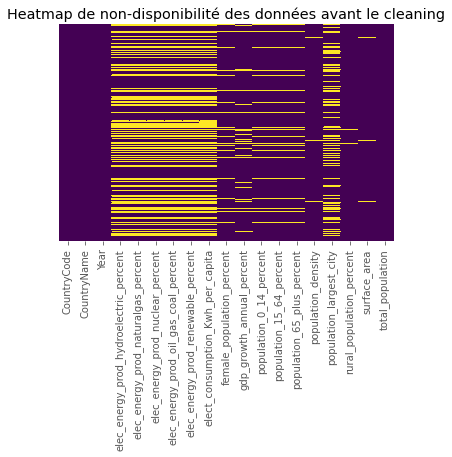

In [11]:
# Heatmap data availability before cleaning
ax = sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Heatmap de non-disponibilité des données avant le cleaning")
plt.savefig("../../img/heatmap_nan_before_cleaning.png", dpi=300)

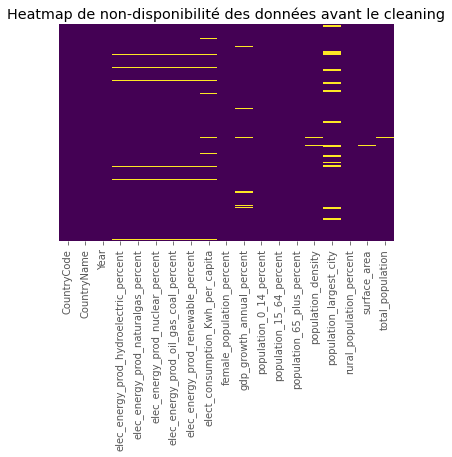

In [46]:
sns.heatmap(df_countries_filtered.isnull(),yticklabels=False,cbar=False,cmap='viridis').set_title("Heatmap de non-disponibilité des données avant le cleaning")
plt.savefig("heatmap_nan_before_cleaning.png", dpi=300)

#### Percentage of data unavailability

In [17]:
(df_countries_filtered.isna().sum(axis=0)/df.shape[0]*100) #taux de donnees manquantes pour chaque colonne

CountryCode                               0.000000
CountryName                               0.000000
Year                                      0.000000
elec_energy_prod_hydroelectric_percent    2.130898
elec_energy_prod_naturalgas_percent       2.130898
elec_energy_prod_nuclear_percent          2.130898
elec_energy_prod_oil_gas_coal_percent     2.130898
elec_energy_prod_renewable_percent        2.130898
elect_consumption_Kwh_per_capita          3.120244
female_population_percent                 0.000000
gdp_growth_annual_percent                 2.777778
population_0_14_percent                   0.000000
population_15_64_percent                  0.000000
population_65_plus_percent                0.000000
population_density                        0.437595
population_largest_city                   5.936073
rural_population_percent                  0.000000
surface_area                              0.380518
total_population                          0.057078
dtype: float64
